In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from config import (user, password, host, port, database)

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['titles', 'salaries', 'employees', 'departments', 'dept_manager', 'dept_emp']

In [4]:
Salaries = Base.classes.salaries
Departments = Base.classes.departments
Dept_Emp = Base.classes.dept_emp
Titles = Base.classes.titles
Employees = Base.classes.employees

In [5]:
session = Session(engine)

In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('salaries')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
salary NUMERIC
salaries_id INTEGER


In [7]:
salaries = session.query(Salaries.salary).order_by(Salaries.salary).all()

salaries_df = pd.DataFrame(salaries)

salaries_df["salary"] = pd.to_numeric(salaries_df["salary"])

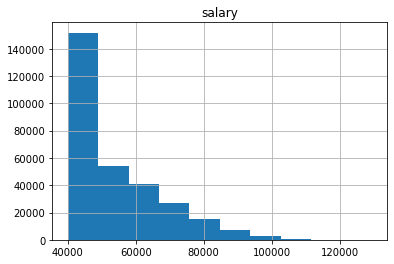

In [8]:
hist = salaries_df.hist(bins = 10)

In [9]:
sel =[Titles.title, func.avg(Salaries.salary)]
title_salaries = session.query(*sel).filter(Employees.emp_title==Titles.title_id, Employees.emp_no==Salaries.emp_no).group_by(Titles.title).all()

title_salaries_df = pd.DataFrame(title_salaries, columns=['Title', 'Average Salary'])
title_salaries_df.set_index('Title', inplace=True)
title_salaries_df['Average Salary'] = pd.to_numeric(title_salaries_df['Average Salary'])



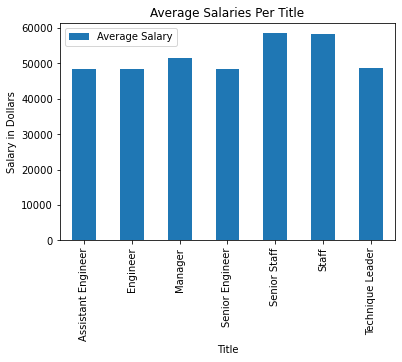

In [10]:
ax = title_salaries_df.plot.bar(title="Average Salaries Per Title")
ax.set_ylabel('Salary in Dollars')
plt.show()